<div style="background-color:#783465 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white"> Data Analyse</h1>
    
<h4 style="color:black"> Datalab V: Julia Boschman, Isa Dijkstra, Daan Eising, Rogier Gernaat </h4>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
    - [&sect;1.1: Uitleg van het Notebook](#1.1)
    - [&sect;1.2: Imports](#1.2)
2. [H2: Inlezen van bestanden](#2.0)
    - [&sect;2.1: Verschillende scholen in bestand](#2.1)
    - [&sect;2.2: Inlezen van bestanden](#2.2)
    - [&sect;2.3: Display van de inhoud van de bestanden](#2.3)
3. [H3: Eerste opschoning van de bestanden](#3.0)
    - [&sect;3.1: Functie van het opschonen van de eerste "fouten" in de data](#3.1)
    - [&sect;3.2: Display van de inhoud van de opgeschoonde bestanden](#3.2)
4. [H4: Berekenen en laten zien van de eerste statistieken](#4.0)
    - [&sect;4.1: Berekenen van statistieken](#4.1)
    - [&sect;4.2: Weergave van de statistieken](#4.2)
    - [&sect;4.3: Gemiddelde woord lengte per school](#4.3)
    - [&sect;4.4: de Vocabulaire Diversiteit](#4.4)
    - [&sect;4.5: Totaal aantal woorden visualiseren](#4.5)
    - [&sect;4.6: Meest voorkomende woorden per school](#4.6)
5. [H5: Verbeteren van de data](#5.0)
    - [&sect;5.1: Inladen van Nederlandse stopwoorden](#5.1)
    - [&sect;5.2: Nederlandse stopwoorden verwijderen](#5.2)
    - [&sect;5.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden](#5.3)
    - [&sect;5.4: Stemmen van de woorden](#5.4)
    - [&sect;5.5: Laatste ronde tekst opschonen](#5.5)
    - [&sect;5.6: Meest voorkomende woorden per school na laatste opschoning](#5.6)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;1.1: Uitleg van het Notebook </h3>

<a name='1.2'></a>
<h3>&sect;1.2: Imports</h3>

In [1]:
#!pip install PyPDF2
#!pip install pdfplumber
#!pip install pdf2image
#!pip install pytesseract

In [1]:
import PyPDF2
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import logging
from collections import Counter

C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Inlezen van de bestanden</strong></h2>
</div>

<a name='2.1'></a>
<h3>&sect;2.1: Verschillende scholen in bestand</h3>

In [2]:
school_pages = {
    "Atlas College, Hoorn": (3, 18),
    "Baudartius College, Zutphen": (19, 48),
    "College Vos, Vlaardingen": (49, 71),
    "Liemers College, Zevenaar": (72, 97),
    "Montaigne Lyceum, Den Haag": (98, 110),
    "Nassau College, Zoetermeer": (111, 129),
    "ORS Lek en Linge": (130, 141),
    "SG Dalton, Voorburg": (142, 158),
    "SG De Rietlanden, Lelystad": (159, 175),
    "Schoonhovens College, Schoonhoven": (176, 189),
    "Stedelijk College, Eindhoven": (190, 208)
}

<a name='2.2'></a>
<h3>&sect;2.2: Inlezen van bestanden</h3>

In [3]:
def read_pdf_sections(file_path, pages_ranges):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        sections_text = {}
        for school, page_range in pages_ranges.items():
            if isinstance(page_range, tuple):
                start, end = page_range
                pages = range(start - 1, end)  # pagina's zijn 0-indexed
            else:
                pages = [page_range - 1]
            section_pages = [pdf_reader.pages[i].extract_text() for i in pages]
            sections_text[school] = ' '.join(filter(None, section_pages))
    return sections_text

school_sections = read_pdf_sections('Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf', school_pages)

<a name='2.3'></a>
<h3>&sect;2.3: Display van de inhoud van de bestanden</h3>

In [4]:
print(school_sections)

{'Atlas College, Hoorn': '33 Eindrapportage  Programma Leermiddelenbeleid\nATLAS COLLEGE, HOORN\nLocatieoverstijgend leermiddelenbeleid door criteria, casussen en \nklankbordgroepen\nNaam school Atlas College, Hoorn\nSchoolsoort vmbo-bkgt/vwo\nAantal leerlingen 4500\n \n  Leermiddelenbeleidsplan\nAmbities  Het Atlas College heeft vijf casussen uitgezet om sleutelvragen rond leermiddelenbeleid \nte beantwoorden, zoals de kosten van zelf ontwikkelen, het gebruik van open leermiddelen en het \ngebruik van 22 criteria voor methodevervanging. De informatie uit deze casussen wordt gebruikt om \nde volgende ambities Atlasbreed voor vijf locaties te realiseren:\nr\x01\x01algemeen:  gebruik van een criterialijst voor samenstellen van leermiddelenpakketten;\nr\x01\x01ict: Elo als centrum voor het arrangeren van leermiddelen; bevordering Elo-gebruik op \nlocatieniveau; zoeken van samenwerking rond gebruik van de Elo en digitale leermiddelen;\nr\x01\x01personeel:  in kaart brengen van leermiddelen

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Eerste opschoning van de bestanden</strong></h2>
</div>

<a name='3.1'></a>
<h3>&sect;3.1: Functie voor het opschonen van de eerste "fouten" in de data</h3>

In [5]:
def advanced_clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text) # Verwijder unicode tekens
    text = re.sub(r'(?:\w\s){2,}', '', text) # Verwijder woorden met ongewone spaties
    text = re.sub(r'[\W_]+', ' ', text) # Verwijder speciale tekens en cijferreeksen
    text = text.lower()
    text = ' '.join(text.split()) # Verwijder overbodige spaties
    return text

In [6]:
cleaned_school_data = {school: advanced_clean_text(text)for school, text in school_sections.items()}

<a name='3.2'></a>
<h3>&sect;3.2: Display van de inhoud van de opgeschoonde bestanden</h3>

In [7]:
cleaned_school_data

{'Atlas College, Hoorn': '33 eindrapportage programma leermiddelenbeleid atlas college hoorn locatieoverstijgend leermiddelenbeleid door criteria casussen en klankbordgroepen naam school atlas college hoorn schoolsoort vmbo bkgt vwo aantal leerlingen 4500 leermiddelenbeleidsplan ambities het atlas college heeft vijf casussen uitgezet om sleutelvragen rond leermiddelenbeleid te beantwoorden zoals de kosten van zelf ontwikkelen het gebruik van open leermiddelen en het gebruik van 22 criteria voor methodevervanging de informatie uit deze casussen wordt gebruikt om de volgende ambities atlasbreed voor vijf locaties te realiseren r algemeen gebruik van een criterialijst voor samenstellen van leermiddelenpakketten r ict elo als centrum voor het arrangeren van leermiddelen bevordering elo gebruik op locatieniveau zoeken van samenwerking rond gebruik van de elo en digitale leermiddelen r personeel in kaart brengen van leermiddelencompetenties formulering van de scholingsbehoefte co rdinatie va

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Berekenen en laten zien van de eerste statistieken</strong></h2>
</div>

<a name='4.1'></a>
<h3>&sect;4.1: Berekenen van Statistieken</h3>

In [22]:
stats = []
for school, text in cleaned_school_data.items():
    tokens = word_tokenize(text)
    word_lengths = [len(word) for word in tokens]
    avg_word_length = sum(word_lengths) / len(word_lengths)
    vocab_diversity = len(set(tokens)) / len(tokens)
    stats.append({
        'School': school,
        'Average Word Length': avg_word_length,
        'Total Words': len(tokens),
        'Vocabulary Diversity': vocab_diversity
    })

df_stats = pd.DataFrame(stats)

<a name='4.2'></a>
<h3>&sect;4.2: Weergaven van de statistieken</h3>

In [23]:
df_stats

,School,Average Word Length,Total Words,Vocabulary Diversity
0,"Atlas College, Hoorn",5.714519,6130,0.221533
1,"Baudartius College, Zutphen",5.299231,7018,0.252066
2,"College Vos, Vlaardingen",5.398820,7457,0.255196
3,"Liemers College, Zevenaar",5.842052,6882,0.224063
4,"Montaigne Lyceum, Den Haag",5.757499,3567,0.306700
5,"Nassau College, Zoetermeer",5.474399,4492,0.280499
6,ORS Lek en Linge,5.166782,4317,0.273801
7,"SG Dalton, Voorburg",5.753442,4794,0.233000
8,"SG De Rietlanden, Lelystad",6.317585,381,0.606299
9,"Schoonhovens College, Schoonhoven",5.765963,3978,0.296129


<a name='4.3'></a>
<h3>&sect;4.3: Gemiddelde woord lengte per school</h3>

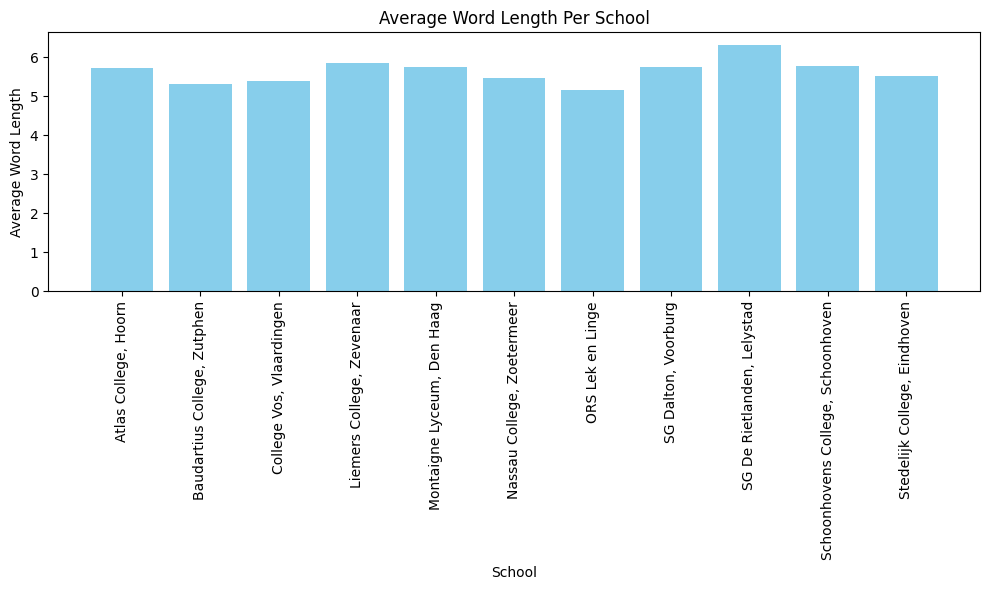

In [24]:
# Gemiddelde Woord lengte per school
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Average Word Length'], color='skyblue')
plt.xlabel('School')
plt.ylabel('Average Word Length')
plt.title('Average Word Length Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='4.4'></a>
<h3>&sect;4.4: de Vocabulaire Diversiteit</h3>

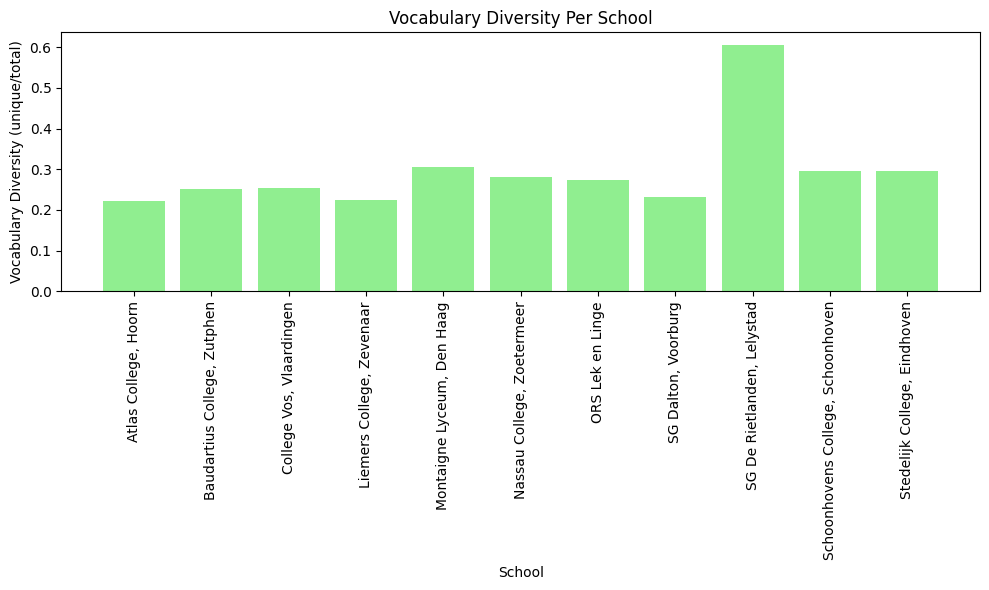

In [25]:
# de Vocabulaire Diversiteit
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Vocabulary Diversity'], color='lightgreen')
plt.xlabel('School')
plt.ylabel('Vocabulary Diversity (unique/total)')
plt.title('Vocabulary Diversity Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='4.5'></a>
<h3>&sect;4.5: Totaal aantal woorden visualiseren</h3>

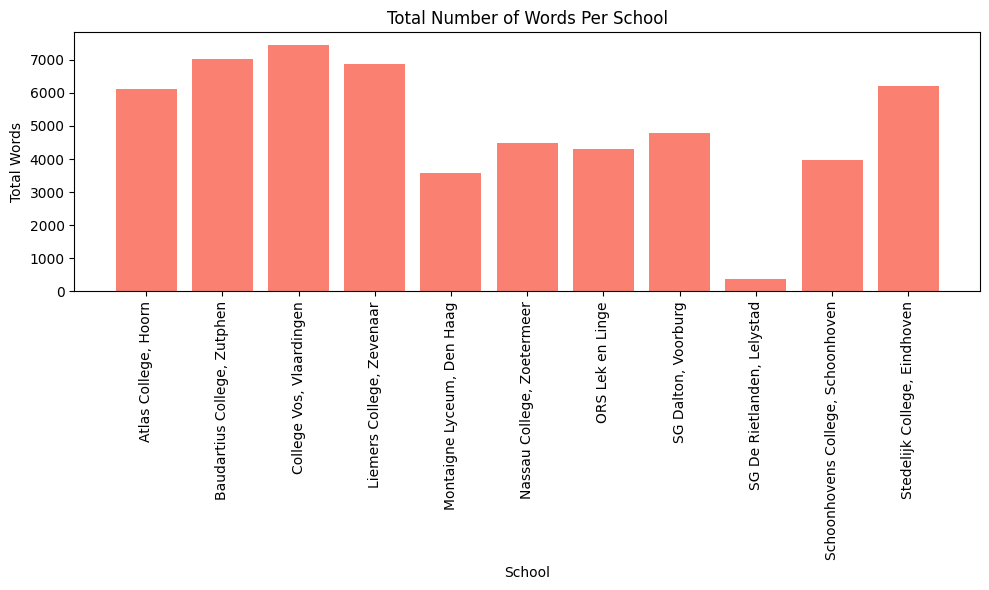

In [26]:
# Totaal aantal woorden visualiseren
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Total Words'], color='salmon')
plt.xlabel('School')
plt.ylabel('Total Words')
plt.title('Total Number of Words Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In het originele document bevatte de school SG De Rietlanden, Lelystad veel data, maar dat is tijdens het inlezen weg gevallen. Dit komt, omdat de tekst bijna volledig werd ingelezen als unicodes waar geen nuttige informatie uit gehaald kan worden. Het is belangrijk om uit te zoeken of ons model het bestand wel volledig kan inlezen, omdat het anders beter is om zulke bestanden te verwijderen. We willen geen bestanden meegeven die alleen maar voor ruis gaan zorgen tijdens het trainen of gebruiken van het model.

<a name='4.6'></a>
<h3>&sect;4.6: Meest voorkomende woorden per school</h3>

In [27]:
common_words = {}
for school, text in cleaned_school_data.items():
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    common_words[school] = word_freq.most_common(5)

for school, words in common_words.items():
    print(f"School: {school}\nCommon Words: {words}\n")

School: Atlas College, Hoorn
Common Words: [('de', 266), ('het', 233), ('en', 230), ('van', 198), ('een', 154)]

School: Baudartius College, Zutphen
Common Words: [('de', 335), ('van', 187), ('het', 186), ('en', 182), ('een', 144)]

School: College Vos, Vlaardingen
Common Words: [('de', 493), ('van', 259), ('en', 212), ('het', 206), ('een', 197)]

School: Liemers College, Zevenaar
Common Words: [('de', 423), ('van', 274), ('en', 259), ('het', 200), ('in', 151)]

School: Montaigne Lyceum, Den Haag
Common Words: [('de', 217), ('van', 171), ('het', 155), ('en', 108), ('in', 74)]

School: Nassau College, Zoetermeer
Common Words: [('de', 249), ('van', 162), ('het', 160), ('en', 122), ('een', 110)]

School: ORS Lek en Linge
Common Words: [('de', 295), ('van', 163), ('het', 142), ('en', 136), ('een', 114)]

School: SG Dalton, Voorburg
Common Words: [('de', 369), ('het', 193), ('van', 165), ('en', 141), ('in', 86)]

School: SG De Rietlanden, Lelystad
Common Words: [('de', 21), ('van', 16), ('r

[Back to the top](#start)
<a name='5.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H5: Verbeteren van de data</strong></h2>
</div>

<a name='5.1'></a>
<h3>&sect;5.1: Inladen van Nederlandse stopwoorden</h3>

In [28]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return set(stopwords)

stop_words = load_stopwords('dutch_stopwords.txt')

<a name='5.2'></a>
<h3>&sect;5.2: Nederlandse stopwoorden verwijderen</h3>

In [29]:
def remove_stopwords(text, stopwords):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords and word.isalnum()]
    return ' '.join(filtered_words)

cleaned_school_data_no_stopwords = {school: remove_stopwords(text, stop_words) for school, text in cleaned_school_data.items()}

<a name='5.3'></a>
<h3>&sect;5.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden</h3>

In [30]:
def get_most_common_words(text, num_words=10):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq.most_common(num_words)

common_words_no_stopwords = {school: get_most_common_words(text) for school, text in cleaned_school_data_no_stopwords.items()}

In [31]:
common_words_no_stopwords

{'Atlas College, Hoorn': [('leermiddelen', 127),
  ('leerlingen', 49),
  ('leermiddel', 44),
  ('ict', 37),
  ('f', 32),
  ('criteria', 31),
  ('geheel', 30),
  ('atlas', 22),
  ('criterialijst', 22),
  ('nieuwe', 21)],
 'Baudartius College, Zutphen': [('leermiddelen', 75),
  ('helemaal', 75),
  ('n', 65),
  ('2', 50),
  ('0', 48),
  ('leerlingen', 43),
  ('s', 42),
  ('gem', 37),
  ('4p', 37),
  ('3', 33)],
 'College Vos, Vlaardingen': [('leerlingen', 66),
  ('leermiddelen', 63),
  ('gebruik', 45),
  ('docenten', 37),
  ('ict', 35),
  ('materiaal', 30),
  ('leerling', 29),
  ('digitale', 29),
  ('werkboeken', 29),
  ('school', 24)],
 'Liemers College, Zevenaar': [('leermiddelen', 120),
  ('leerlingen', 46),
  ('docenten', 41),
  ('gebruik', 37),
  ('teletop', 33),
  ('ict', 32),
  ('gevolgen', 31),
  ('project', 30),
  ('2009', 27),
  ('2', 25)],
 'Montaigne Lyceum, Den Haag': [('materiaal', 50),
  ('school', 30),
  ('ontwikkelen', 26),
  ('montaigne', 23),
  ('2010', 20),
  ('lyceum'

Er komen veel woorden naar boven die op elkaar lijken, denk bijvoorbeeld aan leerling en leerlingen. Het is handig om een vorm van stemming of lemmatization toe te passen, omdat zulk soort woorden de zelfde betekenis hebben.

Daarnaast zien we ook veel enkele letters terug in de meest voorkomende woorden. Deze hebben geen betekenis en willen we ook verwijderen.

Als laatste komen er veel enkele cijfers terug die op zich zelf geen betekenis hebben. Belangrijke cijfers als bedragen willen we wil behouden, maar deze worden aangegeven met een euro teken. Daarom willen we de cijfers uit de teksten halen die alleen staan.

<a name='5.4'></a>
<h3>&sect;5.4: Stemmen van de woorden</h3>

In [32]:
stemmer = SnowballStemmer("dutch")

def stem_words(words, stemmer):
    return [stemmer.stem(word) for word in words]

<a name='5.5'></a>
<h3>&sect;5.5: Laatste ronde tekst opschonen</h3>

In [33]:
def process_text(text, stopwords, stemmer):
    words = word_tokenize(text)
    # Filter woorden: verwijder stopwoorden, alfanumerieke woorden, en woorden met één letter, en losse cijfers
    filtered_words = [word for word in words if word.lower() not in stopwords and len(word) > 1 and word.isalnum() and not word.isdigit()]
    # Pas stemming toe
    stemmed_words = stem_words(filtered_words, stemmer)
    return ' '.join(stemmed_words)

processed_school_data = {school: process_text(text, stop_words, stemmer) for school, text in cleaned_school_data.items()}

<a name='5.6'></a>
<h3>&sect;5.6: Meest voorkomende woorden per school na laatste opschoning</h3>

In [34]:
common_words_processed = {school: get_most_common_words(text) for school, text in processed_school_data.items()}

for school, words in common_words_processed.items():
    print(f"School: {school}\nTop Words: {words}\n")

School: Atlas College, Hoorn
Top Words: [('leermiddel', 171), ('leerling', 63), ('ict', 37), ('criteria', 31), ('gehel', 31), ('gebruik', 24), ('nieuw', 23), ('docent', 23), ('atlas', 22), ('criterialijst', 22)]

School: Baudartius College, Zutphen
Top Words: [('leermiddel', 81), ('helemal', 75), ('leerling', 55), ('schol', 39), ('gem', 37), ('4p', 37), ('docent', 32), ('vak', 29), ('ict', 25), ('gan', 21)]

School: College Vos, Vlaardingen
Top Words: [('leerling', 95), ('leermiddel', 65), ('docent', 61), ('gebruik', 52), ('werkboek', 51), ('digital', 46), ('ict', 35), ('jar', 32), ('gesprek', 32), ('materiaal', 30)]

School: Liemers College, Zevenaar
Top Words: [('leermiddel', 124), ('leerling', 62), ('docent', 59), ('project', 49), ('gebruik', 43), ('teletop', 33), ('digital', 32), ('ict', 32), ('gevolg', 32), ('ontwikkel', 31)]

School: Montaigne Lyceum, Den Haag
Top Words: [('materiaal', 50), ('schol', 33), ('ontwikkel', 32), ('montaign', 23), ('leerling', 18), ('team', 18), ('lyce